In [1]:
"""
Imports
"""

import seaborn as sns
import pandas
import os
import sys
import re
import pickle

import matplotlib.pyplot as plt

In [104]:
"""
Data Extraction functions
"""

def get_data_from_exp(exp):
    files = os.listdir('./'+exp)
    
    pdata = pandas.DataFrame()
    white_time = []
    #pdata = None
    for file_name in files:
            pattern = re.compile('.*result$')
            if pattern.match(file_name):
                with open('./'+exp+'/'+file_name, 'rb') as fp:
                        result = pickle.load(fp)
                        #print(file_name)
                        #print(result)
                        plop = {}
                        plop["response_time"]=result["response_time"]
                        plop["boule"]=result["boule"]
                        if pdata.empty:
                            pdata = pandas.DataFrame(plop)
                        pdata = pandas.concat([pdata,pandas.DataFrame(plop)])
                        white_time.extend(result["white_time"])
    return pdata,white_time

In [14]:
pd = get_data_from_exp("results/default2")

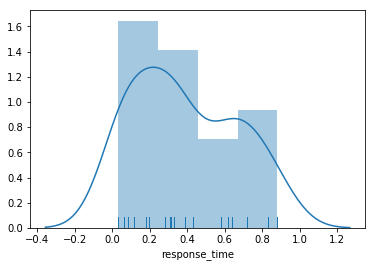

0.388222682476
40
16


TypeError: float() argument must be a string or a number, not 'dict'

In [109]:
pd,white = get_data_from_exp("results/ulysse")
pd.response_time.mean()
a = pd.where(pd.boule == True).dropna().response_time
b = pd.where(pd.boule == False).dropna().response_time

sns.distplot(a,rug=True, hist=True)
plt.show()
print(a.mean())
print(len(a))
print(len(white))
plop = {
    "Hit":len(a),
    "Miss":len(white)-len(a),
    "False Alarm":len(b),
}
plt.plot(plop)
plt.show()

In [93]:
(1-sum(pd.boule)/len(pd.boule))*100

45.833333333333336